############################################################################################
################## -- Programa de Especialización en Data Science Nivel I --############################
############################################################################################

Autores : José Cárdenas - André Chávez 

#### 1 LIBRERÍAS A UTILIZAR

In [1]:
# Primer Curso de ML
#Importar las librerías necesarias en Python.
import pandas as pd ## Manejo de dataframes o set de datos
%matplotlib inline
import matplotlib.pyplot as plt2 ## Todo lo referente a gráficas y demás.
import matplotlib as plt
import numpy as np ## Todo lo referente a trabajar con vectores y matrices
from scipy import stats ## Herramientas y algoritmos matemáticos para python
import seaborn as sns # Se basa en Matplotlib y la complementa en el tema de graficos y demás.

#### 2 EXTRAYENDO LA DATA

In [3]:
train = pd.read_csv("C:Users/Andre Chavez/Desktop/Data/train.csv") 
# Leer el dataset en un dataframe usando pandas

In [4]:
#Leer los primeros registros.
sns.set(style='darkgrid')
train.head(10) # Puedes visualizar la cantidad de registro que requieras

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
# Podemos ver la estructura de los datos
print('Estructura de los datos') 
[(col, type(train[col][0])) for col in train.columns] 

Estructura de los datos


[('Loan_ID', str),
 ('Gender', str),
 ('Married', str),
 ('Dependents', str),
 ('Education', str),
 ('Self_Employed', str),
 ('ApplicantIncome', numpy.int64),
 ('CoapplicantIncome', numpy.float64),
 ('LoanAmount', numpy.float64),
 ('Loan_Amount_Term', numpy.float64),
 ('Credit_History', numpy.float64),
 ('Property_Area', str),
 ('Loan_Status', str)]

#### 3 EXPLORACION DE LA DATA

#### Recurso: https://www.analyticsvidhya.com/blog/2014/07/statistics/

In [6]:
train.describe() #Resumen de la información

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


La función describe () proporcionaría count - conteo o número de elementos, mean - media, standard deviation (std) - desviación estándar, min - mínimo, cuartiles y max - máximo en su salida. Sólo considera las variables en formato de número.

#### Aquí hay algunas conclusiones

1. LoanAmount tiene (614 – 592) 22 valores perdidos.
2. Loan_Amount_Term tiene (614 – 600) 14 valores perdidos.
3. Credit_History tiene (614 – 564) 50 valores perdidos.
4. Nosotros podemos también observar que cerca del 84% de los solicitantes al préstamo tienen un historial crediticio. ¿Cómo? La media del campo Credit_History es 0.84 (Recordemos, Credit_History tiene o toma el valor 1 para aquellos que tienen historial crediticio y 0 en caso contrario).
5. La variable ApplicantIncome parece estar en línea con las espectativas al igual que CoapplicantIncome.

In [7]:
# Tabla Resumen
train.describe(include='all') # Describir todas las variables.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001974,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [ ]:
# Gráficos para variables cuantitativas
#Histogramas y Cajas

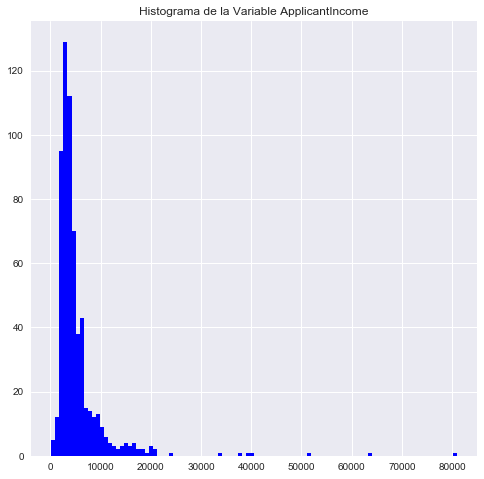

In [8]:
# Análisis Univariado de los atributos del data set
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Histograma de la Variable ApplicantIncome')
train['ApplicantIncome'].hist(figsize=(8,8),color="blue",bins=100)

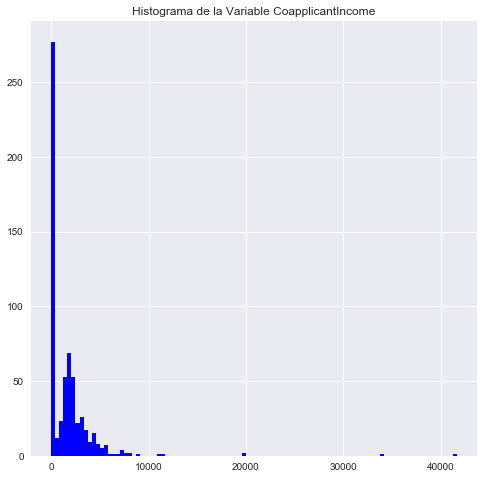

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Histograma de la Variable CoapplicantIncome')
train['CoapplicantIncome'].hist(figsize=(8,8),color="blue",bins=100)

### Cuartiles y diagramas de cajas

Los cuartiles son los tres valores de la variable estadística que dividen a un conjunto de datos ordenados en cuatro partes iguales. Q1, Q2 y Q3 determinan los valores correspondientes al 25%, al 50% y al 75% de los datos. Q2 coincide con la mediana.

Los diagramas de cajas son una presentación visual que describe varias características importantes al mismo tiempo, tales como la dispersión y simetría. Para su realización se representan los tres cuartiles y los valores mínimo y máximo de los datos, sobre un rectángulo, alineado horizontal o verticalmente. Estos gráficos nos proporcionan abundante información y son sumamente útiles para encontrar valores atípicos y comparar dos conjunto de datos.



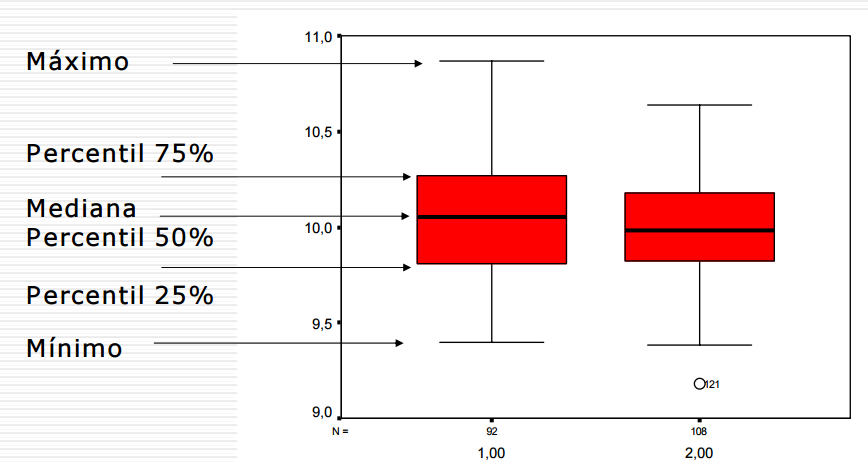

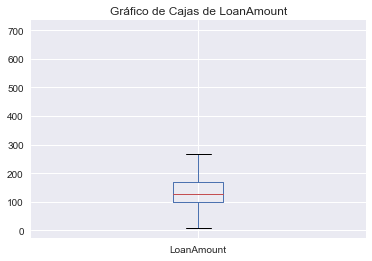

In [9]:
# Gráfico de Cajas
plt.title('Gráfico de Cajas de LoanAmount')
train.boxplot(column='LoanAmount',showfliers='T',notch=0, sym='+', vert=1, whis=1.5)

C:\Users\Andre Chavez\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


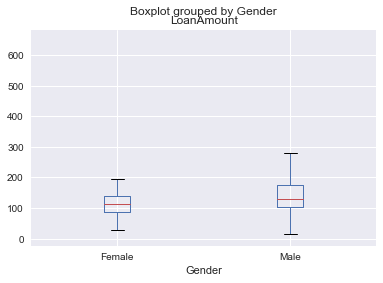

In [10]:
train.boxplot(column='LoanAmount',showfliers='T',notch=0, sym='+', vert=1, whis=1.5,by='Gender')

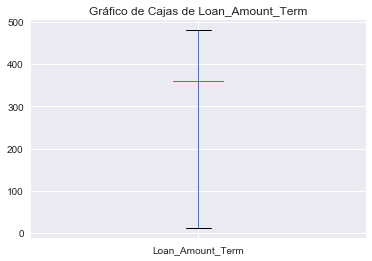

In [11]:
import matplotlib.pyplot as plt
plt.title('Gráfico de Cajas de Loan_Amount_Term')
train.boxplot(column='Loan_Amount_Term',autorange='T',showfliers='T',notch=0, sym='+', vert=1, whis=1.5)

In [ ]:
# Tablas de contingencia para variables cualitativas

In [12]:
# Tabla de Contingencia para la Variable Loan_Status
import numpy as np
import pandas as pd
import os

my_tab = pd.crosstab(train["Loan_Status"],columns="count",normalize='all')
my_tab

col_0,count
Loan_Status,
N,0.312704
Y,0.687296


In [13]:
# Tabla de Contingencia para la Variable Gender
import numpy as np
import pandas as pd
import os

my_tab = pd.crosstab(index=train["Gender"],columns="count",normalize='all')
my_tab

col_0,count
Gender,
Female,0.186356
Male,0.813644


In [38]:
# Tabla de Contingencia para la Variable Married
import numpy as np
import pandas as pd
import os

my_tab = pd.crosstab(index=train["Married"],columns="count")
my_tab

col_0,count
Married,
No,213
Yes,398


#### 4 IMPUTACION DE LA DATA

In [14]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train.apply(num_missing, axis=0)) # Axis = 0 es vertical , axis =1 horizontal.

Valores perdidos por columna
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [5]:
# Particionando la data en Numéricos (Variables Cuantitativas) y Factores (Variables Cualitativas)

In [ ]:
# Conocimiento de los tipos o tipología de datos

In [15]:
# Viendo las variables por tipo de datos
tipos = train.columns.to_series().groupby(train.dtypes).groups
tipos

{dtype('int64'): Index(['ApplicantIncome'], dtype='object'),
 dtype('float64'): Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
        'Credit_History'],
       dtype='object'),
 dtype('O'): Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'Property_Area', 'Loan_Status'],
       dtype='object')}

In [16]:
# Recodificando y convirtiendo las variables de acuerdo a nuestro criterio
# Data de Entrenamiento
#train = pd.read_csv("C:/Users/Andre Chavez/Desktop/DictadodeCursos/Machine Learning for Data Science-URP/DataSet/Aprendizaje Supervisado/train.csv") # Leer el dataset en un dataframe usando pandas
train['Dependents'] = train['Dependents'].replace({'0': 1,'1': 2, '2': 3, '3+': 4})
train['Gender'] = train['Gender'].replace({'Female': 1,'Male': 2})
train['Married'] = train['Married'].replace({'No': 1,'Yes': 2})
train['Self_Employed'] = train['Self_Employed'].replace({'No': 1,'Yes': 2})
train['Education'] = train['Education'].replace({'Graduate': 1,'Not Graduate': 2})
train['Credit_History'] = train['Credit_History'].replace({0: 1,1: 2})
train['Property_Area'] = train['Property_Area'].replace({'Rural': 1, 'Semiurban': 2, 'Urban': 3})
train['Loan_Status'] = train['Loan_Status'].replace({'N': 0,'Y': 1})

In [17]:
# Revisamos si la recodigicación fue la idónea
train.describe(include='all') 
#train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601.000000,611.000000,599.000000,614.000000,582.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000
unique,614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,LP001974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.813644,1.651391,1.762938,1.218241,1.140893,5403.459283,1621.245798,146.412162,342.00000,1.842199,2.037459,0.687296
std,NaN,0.389718,0.476920,1.015216,0.413389,0.348211,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.787482,0.463973
min,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,150.000000,0.000000,9.000000,12.00000,1.000000,1.000000,0.000000
25%,NaN,2.000000,1.000000,1.000000,1.000000,1.000000,2877.500000,0.000000,100.000000,360.00000,2.000000,1.000000,0.000000
50%,NaN,2.000000,2.000000,1.000000,1.000000,1.000000,3812.500000,1188.500000,128.000000,360.00000,2.000000,2.000000,1.000000
75%,NaN,2.000000,2.000000,3.000000,1.000000,1.000000,5795.000000,2297.250000,168.000000,360.00000,2.000000,3.000000,1.000000


In [18]:
# Creamos un copia del dataset original para poder realizar las imputaciones
# Imputacion del Data train
train_parametrica=train.copy()
train_parametrica.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2.0,1.0,1.0,1,1.0,5849,0.0,NaN,360.0,2.0,3,1
1,LP001003,2.0,2.0,2.0,1,1.0,4583,1508.0,128.0,360.0,2.0,1,0
2,LP001005,2.0,2.0,1.0,1,2.0,3000,0.0,66.0,360.0,2.0,3,1
3,LP001006,2.0,2.0,1.0,2,1.0,2583,2358.0,120.0,360.0,2.0,3,1
4,LP001008,2.0,1.0,1.0,1,1.0,6000,0.0,141.0,360.0,2.0,3,1


In [22]:
# Imputación Paramétrica
# Para variables cuantitativas se puede usar medias o medianas, para las cualitativas moda.
# Imputamos por las moda todas las variables cualitativas
from scipy.stats import mode

for column in ['Gender', 'Married', 'Self_Employed', 'Credit_History','Dependents']:
    train_parametrica[column] = train_parametrica[column].fillna(train_parametrica[column].mode()[0])

# Imputamos por las moda todas las variables cuantitativas

for column in ['LoanAmount', 'Loan_Amount_Term']:
    train_parametrica[column] = train_parametrica[column].fillna(train_parametrica[column].mean())    

In [23]:
train_parametrica.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,1.817590,1.653094,1.744300,1.218241,1.133550,5403.459283,1621.245798,146.412162,342.000000,1.855049,2.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.352339,0.787482,0.463973
min,1.000000,1.000000,1.000000,1.000000,1.000000,150.000000,0.000000,9.000000,12.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,2877.500000,0.000000,100.250000,360.000000,2.000000,1.000000,0.000000
50%,2.000000,2.000000,1.000000,1.000000,1.000000,3812.500000,1188.500000,129.000000,360.000000,2.000000,2.000000,1.000000
75%,2.000000,2.000000,2.000000,1.000000,1.000000,5795.000000,2297.250000,164.750000,360.000000,2.000000,3.000000,1.000000
max,2.000000,2.000000,4.000000,2.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,2.000000,3.000000,1.000000


In [24]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


#### 5 CREACION Y TRANSFORMACION DE VARIABLES

##### Creación de Variables Paramétricamente o por Decisión de Negocio

In [ ]:
# También conocido como proceso de Feature Engineering, no olvidar que todo lo que le hacemos al Train o Entrenamiento se lo
# debemos hacer a la data de test.

In [26]:
#Creación de variables a partir de las definidas
import numpy as np
import pandas as pd

#Creamos las variables para el entrenamiento o train
train_parametrica['TotalIncome'] = train_parametrica['ApplicantIncome'] + train_parametrica['CoapplicantIncome']
train_parametrica['LoanAmount_Log'] = round(np.log(train_parametrica['LoanAmount']),2)
train_parametrica['AmountxTerm']=round(train_parametrica['LoanAmount']/train_parametrica['Loan_Amount_Term'],2)

In [27]:
# Revisamos las variables creadas, derrepente queremos crear algunas más?
train_parametrica.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_Log,AmountxTerm
0,LP001002,2.0,1.0,1.0,1,1.0,5849,0.0,146.412162,360.0,2.0,3,1,5849.0,4.99,0.41
1,LP001003,2.0,2.0,2.0,1,1.0,4583,1508.0,128.000000,360.0,2.0,1,0,6091.0,4.85,0.36
2,LP001005,2.0,2.0,1.0,1,2.0,3000,0.0,66.000000,360.0,2.0,3,1,3000.0,4.19,0.18
3,LP001006,2.0,2.0,1.0,2,1.0,2583,2358.0,120.000000,360.0,2.0,3,1,4941.0,4.79,0.33
4,LP001008,2.0,1.0,1.0,1,1.0,6000,0.0,141.000000,360.0,2.0,3,1,6000.0,4.95,0.39


#### 6 BALANCEO DE LOS DATOS Y SELECCIÓN DE DRIVERS

In [39]:
# Le quitamos la variable Loan_ID o identificador único para poder modelar la información 
train_parametrica = train_parametrica.drop('Loan_ID', axis=1)

## Remuestreo

Una técnica ampliamente adoptada para tratar conjuntos de datos altamente desequilibrados se llama remuestreo. Consiste en eliminar muestras de la clase mayoritaria (submuestreo o undersampling) y / o agregar más ejemplos de la clase minoritaria (sobremuestreo o oversampling).



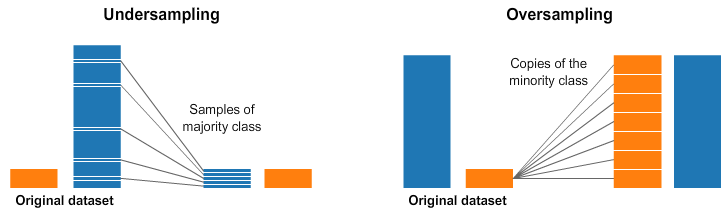

In [40]:
train_parametrica.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_Log,AmountxTerm
0,2.0,1.0,1.0,1,1.0,5849,0.0,146.412162,360.0,2.0,3,1,5849.0,4.99,0.41
1,2.0,2.0,2.0,1,1.0,4583,1508.0,128.000000,360.0,2.0,1,0,6091.0,4.85,0.36
2,2.0,2.0,1.0,1,2.0,3000,0.0,66.000000,360.0,2.0,3,1,3000.0,4.19,0.18


Clase 0: 192
Clase 1: 422
Proportion Clase 0: 0.31 : 0
Proportion Clase 1: 0.69 : 1


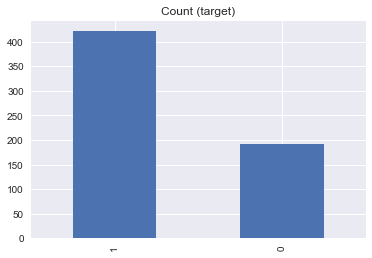

In [41]:
## Podemos hacer el balanceo de manera artesanal , para entender las lógicas.

import numpy as np
import pandas as pd
import seaborn as sns

target_count = train_parametrica.Loan_Status.value_counts()
print('Clase 0:', target_count[0])
print('Clase 1:', target_count[1])

print('Proportion Clase 0:', round(target_count[0] / (target_count[0]+target_count[1]), 2), ': 0')
print('Proportion Clase 1:', round(target_count[1] / (target_count[0]+target_count[1]), 2), ': 1')


target_count.plot(kind='bar', title='Count (target)');



In [42]:
# Conteo de las Clases
# La clase 1 es la de los préstamos otorgados , tenemos 422 préstamos otorgados
# La clase 0 es la de los préstamos no otorgados , tenemos 192 préstamos no otorgados
count_class_1,count_class_0 = train_parametrica.Loan_Status.value_counts()

# Dividimos las Clases
df_class_0 = train_parametrica[train_parametrica['Loan_Status'] == 0]
df_class_1 = train_parametrica[train_parametrica['Loan_Status'] == 1]

## Podemos visualizar el contenido del objeto df_class_1.head(5)

#### Oversampling o sobre-muestreo

Random over-sampling:
1    422
0    422
Name: Loan_Status, dtype: int64


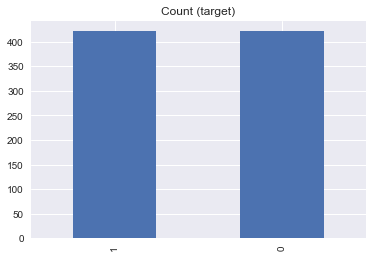

In [44]:
# Leemos la lógica : Del dataset de la clase 0 , sacamos una muestra de tamaño 422 con reemplazo.
df_class_0_over = df_class_0.sample(count_class_1, replace=True)
df_balanceado_over = pd.concat([df_class_1, df_class_0_over], axis=0)

print('Random over-sampling:')
print(df_balanceado_over.Loan_Status.value_counts())

df_balanceado_over.Loan_Status.value_counts().plot(kind='bar', title='Count (target)');


In [45]:
# Podemos usar el dataset generado por oversampling para aplicar todos los algoritmos deseados
df_balanceado_over.head(3)
#df_balanceado_over.describe() Podemos verificar cuántos elementos tenemos por under y over sampling

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_Log,AmountxTerm
0,2.0,1.0,1.0,1,1.0,5849,0.0,146.412162,360.0,2.0,3,1,5849.0,4.99,0.41
2,2.0,2.0,1.0,1,2.0,3000,0.0,66.000000,360.0,2.0,3,1,3000.0,4.19,0.18
3,2.0,2.0,1.0,2,1.0,2583,2358.0,120.000000,360.0,2.0,3,1,4941.0,4.79,0.33


In [46]:
# Creación de la data de train y la data de test
X_over, y_over = df_balanceado_over.drop('Loan_Status', axis=1), df_balanceado_over['Loan_Status']


## Selección de Drivers

### Selección de Drivers Mediante Técnicas Paramétricas

#### Selección Univariada

Las pruebas estadísticas se pueden usar para seleccionar aquellas características que tienen la relación más fuerte con la variable de salida.
La biblioteca scikit-learn proporciona la clase SelectKBest que se puede usar con un conjunto de diferentes pruebas estadísticas para seleccionar un número específico de características.

In [33]:
### Utilizamos la información obtenida con el balanceo mediante oversampling
df_balanceado_over.head(2)
#X_over.shape
#y_over.shape

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_Log,AmountxTerm
0,LP001002,2.0,1.0,1.0,1,1.0,5849,0.0,146.412162,360.0,2.0,3,1,5849.0,4.99,0.41
2,LP001005,2.0,2.0,1.0,1,2.0,3000,0.0,66.000000,360.0,2.0,3,1,3000.0,4.19,0.18


### Selección de Drivers Mediante Técnicas de Machine Learning

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import tree

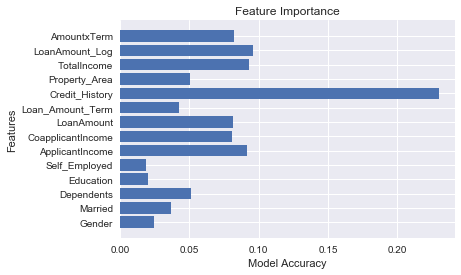

In [51]:
# fit an Extra Tree model to the data
extree = ExtraTreesClassifier()
extree.fit(X_over, y_over)

# display the relative importance of each attribute
relval = extree.feature_importances_


# horizontal bar plot of feature importance
pos = np.arange(14) + 0.5
plt.barh(pos, relval, align='center')
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features")
plt.yticks(pos, ('Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount'
             ,'Loan_Amount_Term','Credit_History','Property_Area','TotalIncome','LoanAmount_Log','AmountxTerm'))
           
plt.grid(True)

#### 7 MODELADO DE LA DATA

In [55]:
# Data Final : df_balanceado_smt pueden elegir cualquiera resultado del producto de un método de balanceo
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

#### Partición de la Data en Train y Test

In [52]:
# ESTA ES LA PARTE MAS IMPORTANTE DE MODELAR
# Creamos la matriz de variables independientes X (VI)y el vector columna de VD loan_Amount_Log no son relevantes por ende 
# podemos prescindir de alguna de ellas
# Pudimos observar en el feature selection que las variables Loan_Amount_Term y LoanAmount_Log
df_balanceado_over2 = df_balanceado_over[['ApplicantIncome','Credit_History','LoanAmount_Log','Loan_Status']]#,df_balanceado_smt['Loan_Status'] #Axis = 1 por columnas


In [53]:
df_balanceado_over2.head(3)

,ApplicantIncome,Credit_History,LoanAmount_Log,Loan_Status
0,5849,2.0,4.99,1
2,3000,2.0,4.19,1
3,2583,2.0,4.79,1


In [56]:
# Creación de la data de train y la data de test

X_train, X_test, y_train, y_test = train_test_split(df_balanceado_over2.drop('Loan_Status', axis=1), df_balanceado_over2['Loan_Status'], test_size=0.30,
                                                   random_state=100)

In [57]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(590, 3) (590,)
(254, 3) (254,)


#### Modelos Supervisados : Regresión Logística

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
y_pred=lr.predict(X_test)

In [60]:
#Atributos
#lr.coef_ 
#lr.score(X, y)

print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.673

	Precision: 0.626
	Recall: 0.948
	F1: 0.754



In [61]:
# Selección de Drivers Paramétricos (Prueba para observar la salida)

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 10)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True]
[1 1 1]


In [62]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

C:\Users\Andre Chavez\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.545272
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  590
Model:                          Logit   Df Residuals:                      587
Method:                           MLE   Df Model:                            2
Date:                Sat, 04 Aug 2018   Pseudo R-squ.:                  0.2130
Time:                        01:52:02   Log-Likelihood:                -321.71
converged:                       True   LL-Null:                       -408.79
                                        LLR p-value:                 1.519e-38
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
ApplicantIncome   4.64e-05   1.79e-05      2.591      0.010    1.13e-05    8.15e-05
Credit_History

#### Realizamos la metodología de Cross Validation para tener un modelo preciso y estable a la vez

In [63]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=590, random_state=7)
lr = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(lr, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.708


In [64]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.86      0.37      0.51       120
          1       0.63      0.95      0.75       134

avg / total       0.74      0.67      0.64       254



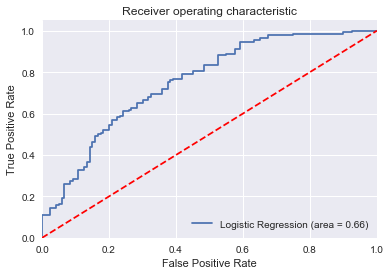

In [65]:
# Obtenemos la Curva Roc

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

lr = LogisticRegression()
lr.fit(X_train, y_train)

logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Modelos Supervisados : Arboles de Clasificación

In [69]:
from sklearn.tree import DecisionTreeClassifier
#Parámetros del árbol de clasificación
# criterion  , splitter ,max_depth,min_impurity_decrease,min_impurity_split,min_samples_leaf,min_samples_split,splitter
arb = DecisionTreeClassifier(criterion='entropy',max_features='sqrt',max_depth=20)
arb.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=20,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [70]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred = arb.predict(X_test)

In [71]:
#Atributos
#arb.classes_ ,feature_importances_ ,max_features_ ,tree_ 

print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.799

	Precision: 0.867
	Recall: 0.731
	F1: 0.794



In [72]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)
arb = DecisionTreeClassifier(criterion='entropy',max_features='sqrt')
scoring = 'accuracy'
results = model_selection.cross_val_score(arb, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.807


In [73]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.74      0.88      0.80       120
          1       0.87      0.73      0.79       134

avg / total       0.81      0.80      0.80       254



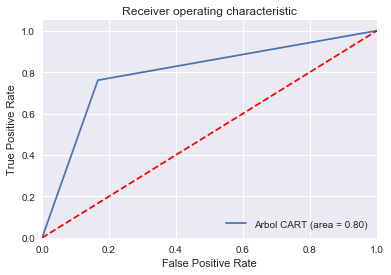

In [74]:
# Obtenemos la Curva Roc

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

arb = DecisionTreeClassifier(criterion='entropy',max_features='sqrt')
arb.fit(X_train, y_train)

arbol_roc_auc = roc_auc_score(y_test, arb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, arb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Arbol CART (area = %0.2f)' % arbol_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Arbol_CART_ROC')
plt.show()

#### 8 ELECCIÓN DEL MEJOR MODELO

In [75]:
# Selección del mejor Modelo
# Cargamos todos los modelos que necesitamos

import numpy as np
from sklearn.model_selection import cross_val_score
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [76]:
kfolds = StratifiedKFold(shuffle=True, random_state=1)

In [77]:
X_train.head(2)

,ApplicantIncome,Credit_History,LoanAmount_Log
370,15759,2.0,4.01
449,2769,2.0,5.25


##### Creamos una función para probar todos nuestros modelos

In [78]:
import numpy as np
def run_model(model, X, y):
    model_name = str(model.__class__).split('.')[-1].replace('>','').replace("'",'')
    print(model_name)
    accuracy = []
    f1 = []
    start = int(time.time() * 1000)
    model.fit(X, y)
    y_ = model.predict(X_test)
    accuracy += [accuracy_score(y_test, y_)]
    f1 += [f1_score(y_test, y_)]
    end = int(time.time() * 1000)
    results.loc[len(results)] = [model_name, np.mean(accuracy), np.std(accuracy), 
                                 np.mean(f1), np.std(f1), str(end - start)]

##### Agrupamos Familias de Modelos según nuestro criterio

In [84]:
# stackclf.fit(X_final, y_final) 
def run_linear_models(X, y):
    
    run_model(LogisticRegression(), X_train, y_train)
    
def run_tree_models(X, y):
    run_model(DecisionTreeClassifier(), X_train, y_train)
   

In [82]:
results = pd.DataFrame(columns=['model', 'accuracy', 'accuracy-std', 'f1-score', 'f1-score-std', 'time'])

#### Corremos todas las familias de modelos propuestos

In [85]:
run_linear_models(X_train, y_train)
run_tree_models(X_train, y_train)


LogisticRegression
DecisionTreeClassifier


#### Tabla de Resultados con todos nuestros modelos

In [86]:
results

,model,accuracy,accuracy-std,f1-score,f1-score-std,time
0,LogisticRegression,0.673228,0.0,0.753709,0.0,6
1,DecisionTreeClassifier,0.803150,0.0,0.801587,0.0,2


#### Tabla de Resultados con todos nuestros modelos ordenados por algún criterio

In [87]:
results.iloc[results['accuracy'].sort_values(ascending=False).index].head(19)

,model,accuracy,accuracy-std,f1-score,f1-score-std,time
1,DecisionTreeClassifier,0.803150,0.0,0.801587,0.0,2
0,LogisticRegression,0.673228,0.0,0.753709,0.0,6


### Listo!!!! Elegimos el mejor clasificador

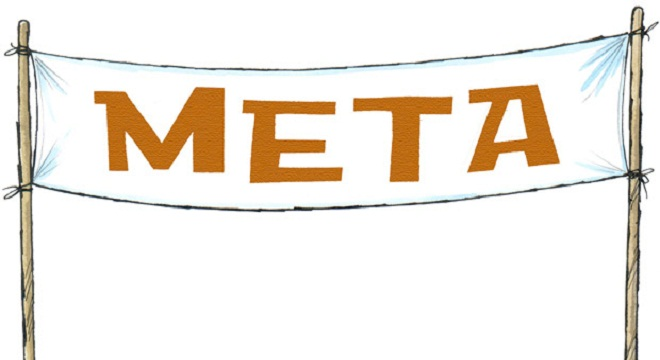